# Baysian Data Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import HTML, Image
import scipy.stats as stats

Bayesian data analysis takes a question in the form of a model and uses logic to produce an answer in the form of probability distributions.

In Baysian data analysis:

- For each possible explanation of the data, count all the ways the data can happen
- Explanations with more ways to produce the data are more plausible

Imagine a bag that contains 4 marbles. Some are blue and some are white. We don't know in what proportion. A table of all the possible combinations looks like this. These possible combinations are our **conjectures**.

|     |     |     |     |
| :-: | :-: | :-: | :-: |
|  B  |  B  |  B  |  B  |
|  B  |  B  |  B  |  W  |
|  B  |  B  |  W  |  W  |
|  B  |  W  |  W  |  W  |
|  W  |  W  |  W  |  W  |

Now suppose that we draw 3 marbles from the bag with replacement. The results from that will be our **data**.

$$
BWB
$$

How could we think about what the 4th marble is likely to be?

Notice that the number of ways to produce the data, for each conjecture, can be computed by first counting the number of paths in each “ring” of the garden and then by multiplying these counts together.

| Conjecture | Number of ways to produce the $$BWB$$ | Plausibility |
| :--------: | :-----------------------------------: | :----------: |
|  $$WWWW$$  |      $$0 \times 4 \times 0 = 0$$      |      0       |
|  $$BWWW$$  |      $$1 \times 3 \times 1 = 3$$      |     0.15     |
|  $$BBWW$$  |      $$2 \times 2 \times 2 = 8$$      |     0.4      |
|  $$BBBW$$  |     $$3 \times 1 \times 3  = 9$$      |     0.45     |
|  $$BBBB$$  |     $$4 \times 0 \times 4  = 0$$      |      0       |

The rules for Baysian updating:

1. State a causal model for how observations arise, given each possible explanation
2. Count ways data could arise for each explanation
3. Relative plausibility is relative value from (2)

Let's suppose we draw another $$B$$ from the bag. We can update our previous (**prior**) counts and update them in light of the new observation becuase the new observation is logically independent of the previous observations. First count the numbers of ways each conjecture could produce the new observation. Then multiply each of these new counts by the prior numbers of ways for each conjecture. In table form:

| Conjecture | Ways to produce $$B$$ | Previous counts |      New count      | New plausibility |
| :--------: | :-------------------: | :-------------: | :-----------------: | :--------------: |
|  $$WWWW$$  |           0           |        0        | $$0 \times 0 = 0$$  |        0         |
|  $$BWWW$$  |           1           |        3        | $$3 \times 1 = 3$$  |     $$0.07$$     |
|  $$BBWW$$  |           2           |        8        | $$8 \times 2 = 16$$ |     $$0.35$$     |
|  $$BBBW$$  |           3           |        9        | $$9 \times 3 = 27$$ |     $$0.57$$     |
|  $$BBBB$$  |           4           |        0        | $$0 \times 4 = 0$$  |        0         |

Obviously you want to normalise these values which is why we have a plausibilty colum. You can can converts the counts to probabilities with the following formula:

$$
plausibility\ of\ p\ after\ D_{new} = \frac {ways\ p\ can\ produce\ D_{new} \times prior\ plausibility\ p} {sum\ of\ products}
$$

In [ ]:
results = np.random.binomial(n=1, p=0.7, size=[10])

yes_line = np.linspace(10,0,20)
no_line = np.linspace(0,10,20)

result_lines = []
for r in results:
    if r == 1:
        result_lines.append(yes_line)
    else:
        result_lines.append(no_line)

In [ ]:
print(results)

[1 1 1 1 1 1 1 0 0 1]


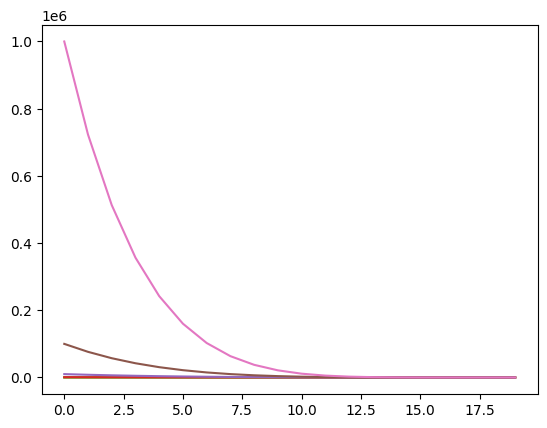

In [ ]:
plt.figure()
for i in range(0, results[:7].shape[0]):
    plt.plot(np.prod(result_lines[:i], axis=0))
plt.show()

In [ ]:
fig, ax = plt.subplots()

def init():
    ax.clear()
    line, = ax.plot(result_lines[0])
    return line,

def animate(i):
    ax.clear()
    index = i % 20
    new_data = np.prod(result_lines[:index], axis=0)
    line, = ax.plot(new_data)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticks(range(0, int(np.ceil(np.max(yes_line)))))
    return line,


ani = FuncAnimation(fig=fig, func=animate, init_func=init, frames=10, interval=1000, blit=True, save_count=20)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

[<matplotlib.lines.Line2D>]

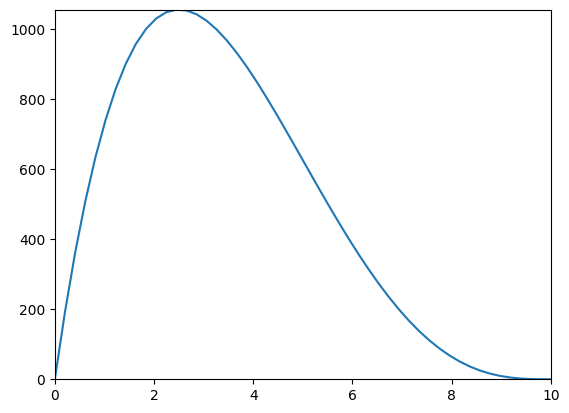

In [ ]:
plt.figure()
plt.margins(x=0, y=0)

yes_line = np.linspace(10,0)
no_line = np.linspace(0,10)
y = yes_line * yes_line * yes_line * no_line
x = no_line
plt.plot(x, y)

# mode = x[np.argmax(y)]
# plt.axvline(x=mode, label="mode")

# mean = np.mean(y)
# plt.axvline(x=mean, label="mean")

In [ ]:
def posterior_grid_approx(grid_points: int = 5, success: int = 6, tosses: int = 9):
    p_grid = np.linspace(0, 1, grid_points)
    print(p_grid)
    prior = np.repeat(5, grid_points) # uniform
    print(prior)
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp
    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)
    print(likelihood)
    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior
    print(unstd_posterior)
    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    print(posterior)
    print()
    return p_grid, posterior    

[0.   0.25 0.5  0.75 1.  ]
[5 5 5 5 5]
[0.         0.00865173 0.1640625  0.2335968  0.        ]
[0.         0.04325867 0.8203125  1.16798401 0.        ]
[0.         0.02129338 0.40378549 0.57492114 0.        ]

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[0.00000000e+00 1.51814898e-06 8.18509295e-05 7.77292279e-04
 3.59857537e-03 1.11609461e-02 2.66829865e-02 5.29210991e-02
 9.08269760e-02 1.38341326e-01 1.89768623e-01 2.36114658e-01
 2.66611252e-01 2.71400562e-01 2.45005089e-01 1.89768623e-01
 1.17918118e-01 5.02667021e-02 8.85384487e-03 0.00000000e+00]
[0.00000000e+00 7.59074491e-06 4.09254647e-04 3.88646139e-03
 1.79928768e-02 5.58047305e-02 1.33414933e-01 2.64605496e-01
 4.54134880e-01 6.91706630e-01 9.48843114e-01 1.18057329e+00
 1.33305626e+00 1.35700281e+00 1.

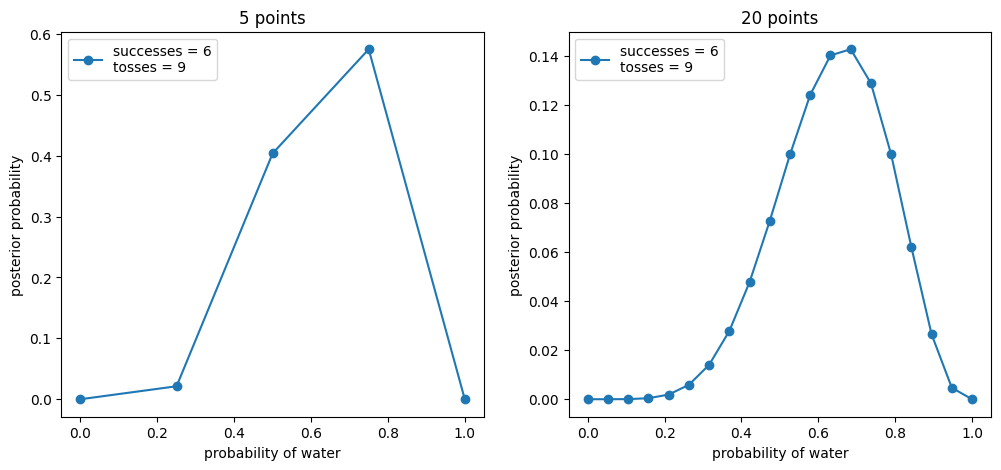

In [ ]:
w, n = 6, 9
_, ax = plt.subplots(1, 2, figsize=(12, 5))

for idx, ps in enumerate((5, 20)):
    p_grid, posterior = posterior_grid_approx(ps, w, n)
    ax[idx].plot(p_grid, posterior, "o-", label=f"successes = {w}\ntosses = {n}")
    ax[idx].set_xlabel("probability of water")
    ax[idx].set_ylabel("posterior probability")
    ax[idx].set_title(f"{ps} points")
    ax[idx].legend(loc=0)

Every updated set of plausibilities becomes the initial plausibilities for the  next observation. Every conclusion is the starting point for future inference. This updating process works backwards as well as forwards. Given a final set of plausibilities and knowing the final observation $$W$$ it is possible to mathematically divide out the observation to infer the previous plausibility curve. So the data could be presented to your model in any order, or all at once even. In most cases you will present the data all at once for convenience. This represents an abbreviation of an iterated learning process.

Some points about Baysian Inference:

1. There is no such thing as a minimum sample size. The curve is likely to be flat and wide when you have little data but that's fine. It might even be enough information to be useful in some sense.
2. The shape of the curve embodies the sample size. As you get more data the curve gets narrower and taller.
3. Point estimates don't have a big role in Baysian data analyis because the the estimate is the curve/distribution. Always use the entire posterior distribution because to do otherwise is to throw away uncertainty and generate overconfident answers. Summary should always be the last step.
4. Intervals don't have a strong role in Baysian inference. How wide to make an interval or even where to centre it is an arbitrary descision.

What proportion of the Earth is covered by water? We aren't going to visit literally every point on Earth. So how can we work this out? We can take a sample. Suppose we visit ten points of earth at random and record whether it is covered by land or water. Suppose these are our results :

$$
W, W, W, L, W, W, W, W, W, L
$$

The counts of “water” $$W$$ and “land’ $$L$$ are distributed binomially, with probability p of “water” on each toss.

$$
Pr(W,L|p) = \frac {(W + L)!} {W!L!} p^W(1 − p)^L
$$

A short way of writing our model

W ~ Binomial(N, p)

Where N = W + L

p ~ Uniform(0,1)